# Module II: Medical Data & Machine Learning

# Lecture 10 - EEG signal processing: independent component analysis + ERP analysis

# By Cheng Peng & Yong Yang

————————————————————————————————————————————————————————————————

# 写在前面

各位同学大家下午好，这次课我们继续Python的学习。

本次课我们的实验任务是掌握基于python的主成分分析（Principal Component Analysis，PCA）算法。

包括知晓这个算法的原理，以及如何用Python语言来实现它。

并且应用该方法对EEG脑电信号进行分析。

————————————————————————————————————————————————————————————————

# 前情提要

开始本次课程之前，我们首先回顾一下上节课的内容。

上节课由于是第一次课，所以我们花时间讲解了一些非常基础的python语言的操作，主要内容有：

配置环境

Anaconda 和 Python 编译环境：

https://www.bilibili.com/video/BV1hE411t7RN/?spm_id_from=333.999.0.0&vd_source=91123ea2d437a2497e09b2dfc55b13be

Jupyter notebook 配置：

https://zhuanlan.zhihu.com/p/33105153?utm_medium=social

相信经过上一节课的折腾，同学们已经在自己的电脑上配置好了相应的环境，这里还是贴出来，万一后面其他同学用得到呢。

基本操作：

（1）导入库

In [2]:
# 导入库 import xxx(库名)
import math

# 导入库 import xxx(库名) as xxx（自定义名称）
import numpy as np
import matplotlib.pyplot as plt

# 导入库 from xxx(库名) import xxx(子库名)
from qpsolvers import solve_qp
from scipy.optimize import minimize

（2）数据读取；

In [3]:
# 读取数据
file_name = 'test.txt'
data = np.loadtxt(file_name, dtype='float32', delimiter=' ')
print("数据")
print(data)

# 读取文字
f = open("test_文本.txt", mode='r', encoding='utf-8')
result = f.read(6)
f.close()
print("文字")
print(result)

数据
[1. 1. 4. 5. 1. 4.]
文字
南方科技大学


（3）循环/迭代；

In [4]:
# for循环
for x in range(1,10):
    print(np.random.uniform(0, 6, size=None))

5.6591954911812135
5.135008160968126
0.9441048248105177
3.7892517568367947
3.0709591929321496
1.1504340950764347
0.8450985037282877
1.3971820166209934
0.3316831780931586


In [5]:
# while循环
i = 0
while i < 20:
    print(np.round(np.random.normal(loc=0, scale=1, size=3)))
    i = i + 2

[ 1.  1. -0.]
[-1. -1. -2.]
[-0. -1. -0.]
[-1. -0. -0.]
[-2. -0.  0.]
[-0. -0. -1.]
[ 1. -2.  0.]
[1. 0. 0.]
[-0. -1.  0.]
[ 0. -0.  0.]


（4）画图；

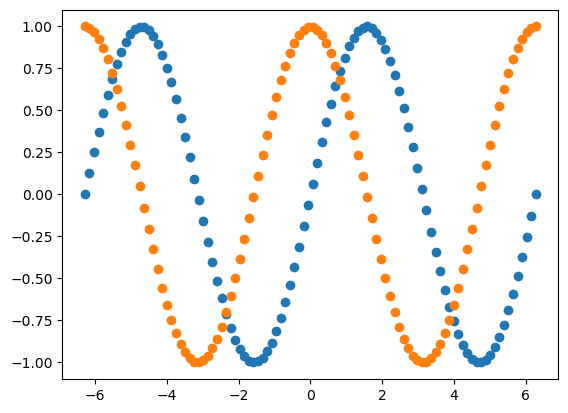

In [6]:
# 画散点
pai = math.pi
x = np.linspace(-2*pai,2*pai,100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.figure()
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.show()

矩阵操作：

（1）创建数组(矩阵)；

In [7]:
# 单位矩阵
A = np.eye(3)
print("A")
print(A)

# 对角矩阵
B = np.diag([1.0, 2.0, 3.0, 4.0])
print("B")
print(B)

# 全0矩阵
C = np.zeros([2, 3])
print("C")
print(C)

# 全1矩阵
D = np.ones([3, 2])
print("D")
print(D)

A
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
B
[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]]
C
[[0. 0. 0.]
 [0. 0. 0.]]
D
[[1. 1.]
 [1. 1.]
 [1. 1.]]


（2）矩阵运算；

In [8]:
A = np.array([[1, 2, 3],[4, 5, 6]])
B = np.array([[4, 5, 6],[7, 8, 9]])

# 矩阵相加
print("A + B")
print(A + B)

# 矩阵相减
print("A - B")
print(A - B)
print("B - A")
print(B - A)

# 矩阵转置
print("A转置")
print(A.T)
print("B转置")
print(np.transpose(B))

# 矩阵相乘1
print("A*B")
print(A*B)
print("B*A")
print(B*A)

# 矩阵相乘2
print("A*B.T")
print(np.dot(A,B.T))
print("B.T*A")
print(np.dot(B.T,A))

A + B
[[ 5  7  9]
 [11 13 15]]
A - B
[[-3 -3 -3]
 [-3 -3 -3]]
B - A
[[3 3 3]
 [3 3 3]]
A转置
[[1 4]
 [2 5]
 [3 6]]
B转置
[[4 7]
 [5 8]
 [6 9]]
A*B
[[ 4 10 18]
 [28 40 54]]
B*A
[[ 4 10 18]
 [28 40 54]]
A*B.T
[[ 32  50]
 [ 77 122]]
B.T*A
[[32 43 54]
 [37 50 63]
 [42 57 72]]


（3）矩阵重组；

In [9]:
A = np.round(np.random.uniform(0, 6, size=[4, 4]))
print("A")
print(A)
print("A的子集")
print(A[2,:])
print("A的子集维数")
print(A[2,:].shape)

A
[[6. 2. 1. 4.]
 [1. 2. 4. 4.]
 [5. 0. 2. 3.]
 [3. 4. 3. 4.]]
A的子集
[5. 0. 2. 3.]
A的子集维数
(4,)


（4）一维数组转置

In [10]:
# 行向量A
A = np.array([1.0, 1.0, 4.0, 5.0, 1.0, 4.0])
print("A")
print(A)

# 转置一维向量的正确操作
A.shape = (1,A.shape[0])
print("A.T")
print(A.T)

A
[1. 1. 4. 5. 1. 4.]
A.T
[[1.]
 [1.]
 [4.]
 [5.]
 [1.]
 [4.]]


矩阵相关参数计算

In [11]:
A = np.round(np.random.uniform(0, 3, size=[5, 5]))
print(A)

# 矩阵的迹trace
print("trace of A")
print(np.trace(A))

# 矩阵的秩rank
print("rank of A")
print(np.linalg.matrix_rank(A))

# 矩阵的维数
print("shape of A")
print(A.shape)

[[1. 2. 2. 0. 1.]
 [1. 0. 1. 3. 3.]
 [1. 2. 3. 2. 2.]
 [1. 0. 0. 0. 0.]
 [1. 1. 1. 2. 3.]]
trace of A
7.0
rank of A
5
shape of A
(5, 5)


————————————————————————————————————————————————————————————————

掌握了比较基础的python操作之后我们开始了正式的《机器学习》相关内容的学习。

主要包括回归模型以及支撑向量机分类器，需要同学们掌握的核心内容是：

# （1）梯度下降法：

其中的关键是梯度下降法的思路，导数求解，以及循环操作。

梯度下降法的思路很朴实。

首先，为了方便演示，我们假设有这么一个处处连续可微的二元函数$ z=f(x,y) $

这个函数在整个$ xoy $平面上有最小值，令 $ z=f(x,y) $最小的坐标点我们记作$ (x^*,y^*) $。

那么，假设从$ xoy $平面上的任意一点$ (x_0,y_0) $出发，怎么得到，或者说以任意精度逼近$ (x^*,y^*) $？

P.S.在Jupyter中输入数学公式：https://blog.csdn.net/smilejiasmile/article/details/80670742

————————————————————————————————————————————————————————————————

第一步：

由于$ z=f(x,y) $处处连续可微，因此在坐标点$ (x_0,y_0) $位置处我们可以计算$ z=f(x,y) $的梯度$ gradf(x_0,y_0) $

第二步：

根据梯度$ gradf(x,y) $的定义，梯度指向的那个方向表示增长最快的方向，那么反过来，梯度的反方向就是下降最快的方向。

那么我们就只需要一直沿着梯度下降的方向去找就可以了。

假设我们现在沿着梯度的反方向走了一步，这一步的长度我们写作$ η $（这里假设$ η>0 $，避免混淆），然后到达了一个新坐标点$ (x_1,y_1) $

显然，$ (x_1,y_1) $和$ (x_0,y_0) $在一条直线上，方向是$ -gradf(x_0,y_0) $

就有向量$ （x_1 - x_0,y_1 - y_0） $与$ -gradf(x_0,y_0) $同方向，那么就有

$ (x_1,y_1) - (x_0,y_0) = - η * gradf(x_0,y_0) $

第三步：

但是也并不是只需要计算一次梯度，然后就可以一直沿着这个方向一条路走到黑就能找到$ (x^*,y^*) $。

原因很简单，一个函数的梯度$ gradf(x,y) $在不同坐标位置指向的方向很有可能是不一样的。

$ -gradf(x_1,y_1) $大概率和$ -gradf(x_0,y_0) $不指向同一个方向。

所以稳妥的办法是走一步看一步，走一步看一部，不断地修正我们要寻找的方向。

因此我们需要重复执行上面的步骤。

第四步：

执行到什么时候结束呢？

当相邻两个坐标点$ (x_1,y_1) $和$ (x_0,y_0) $处的函数值足够接近的时候，就可以停止了。

也就是$ abs(f(x_1,y_1)-f(x_0,y_0))$小于我们给定的精度要求的时候。

具体原理是数学上的内容，也就是单调数列极限存在的问题，这里不展开了，毕竟我们是编程为主的课程。

P.S：

以上的说明只是简要阐述了梯度下降法的原理，在实际应用中，梯度下降法会遇到的实际情况要复杂的多。

比如$ z=f(x,y) $存在多个极值点，此时从不同的初始坐标点$ (x_0,y_0) $开始计算时，得到的结果就可能不同。

还有$ z=f(x,y) $没有极值，或者存在限制条件时才能计算极值等问题，需要具体情况具体分析。

另外，以上虽然只是一个二元函数的例子，但是也可以拓展到任意维度的函数。

不妨将函数表示为$ u=f(\vec{r}) $，其中$ \vec{r}=(x,y,z,...) $表示坐标点的位置矢量，将以上操作还原为矢量操作就能得到高维情况下的结果。

也就是：$ \vec{r}_{n+1} = \vec{r}_n - η * gradf(\vec{r}_n) $

编程时也建议各位同学多采用矢量思路，有助于理解，也有助于拓展程序的应用范围。

下面是一个范例：

范例中用到的三维图命令：https://www.php.cn/python-tutorials-495452.html

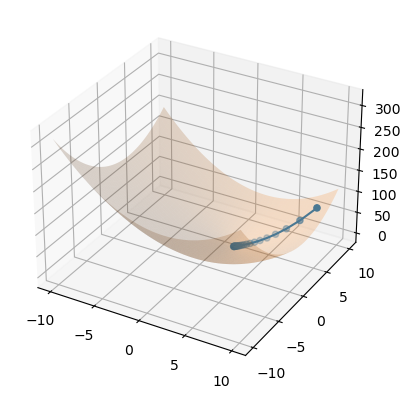

In [12]:
# 梯度下降法范例程序3

# 导入库
import numpy as np
import matplotlib.pyplot as plt

# 定义自变量
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)


# 定义函数
def f(x_1, x_2):
    return (x_1 - 2) ** 2 + (x_2 - 3) ** 2


# 计算函数
z = f(x, y)

# 梯度下降
# 定义梯度
def grad_f(x_1, x_2):
    return 2 * (x_1 - 2), 2 * (x_2 - 3)


# 定义学习率与初始值
gama = 0.1
x0 = 10
y0 = 10

# 循环计算
xx = np.zeros([20])
yy = np.zeros([20])
for i in range(0, 20):
    x1 = x0 - gama*grad_f(x0, y0)[0]
    y1 = y0 - gama*grad_f(x0, y0)[1]
    xx[i] = x1
    yy[i] = y1
    x0 = x1
    y0 = y1

zz = f(xx, yy)

# 创建图像
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# 画曲线
ax.plot(xx, yy, zz)
ax.scatter(xx, yy, zz)

# 画曲面
surf = ax.plot_surface(x, y, z, alpha=0.2)

# 显示
plt.show()

# （2）二次规划问题的求解

其中的关键是拉格朗日乘数法，以及二次规划问题的求解。

主要用到了scipy.optimize库中的minimize函数，以及qpsolvers库函数，其中的关键是矩阵的构造以及各个函数的使用方法。

支撑向量机SVM归根结底就属于求解一个二次规划问题，因此掌握二次规划问题求解，就可以处理SVM问题了。

这一部分后面马上就讲到，所以我们这里就不贴范例程序了。

以上内容的具体范例在上一节课的Jupyter notebook上，这里就不再赘述了，当课程进行到对应阶段的时候，我们再做简单的回顾，帮助一下加深印象。

如果有同学们觉得不清楚的地方，还请下课之后多多练习，或者向一些高手同学们请教，当然也可以来找老师。

————————————————————————————————————————————————————————————————

# 内容补充

在正式开始本节课的内容之前，我们先补充一些内容。

在上一次课中，我们虽然讲解了支撑向量机（SVM），但是我们只讲解了最基础版本的SVM，没有提及核方法以及软边界问题。

因此在这里我们就做一个简短的补充。

然后上一次课同学们还反映说很多数学原理和公式忘记了，需要重新看之前刘泉影老师的ppt。

所以这一次我们会适当的补充一些理论的内容在里面。

————————————————————————————————————————————————————————————————

# 一般的支撑向量机

支撑向量机是一类监督学习模型，在事先知道样本点分类情况的前提下，求取能够最大程度的将两个样本分开的超平面（最大似然超平面）。

在最简单的情况下，需要分类的两组数据之间存在明显的“界限”，如下图所示

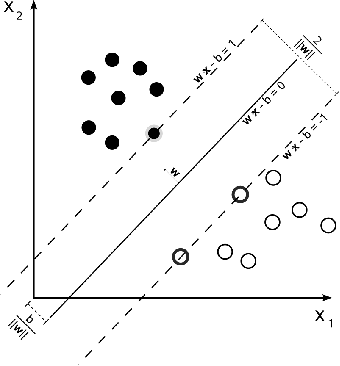

在这种情况下，我们假设存在这样一个平面

$ w^T*x + b =0 $

是满足我们要求的“最大似然超平面”，它能最大程度的分隔开两组数据集

w是这个超平面的法向量，b相当于这个超平面的“截距”

由于平面

$ w^T*x + b =0 $ 

“正好”分开了两组数据，所以，两组数据中距离平面

$ w^T*x + b =0 $

最近的点距离应该相等。

在实际情况中，这个距离可以是任意的数值，但是由于在一个平面

$ w^T*x + b =0 $ 

两端乘以任意常数还表示这个平面，所以为了方便计算，我们不妨将这个距离设为“1”

也就是这两个平面

$ w^T*x + b =-1 $ 

和

$ w^T*x + b =1 $ 

的来历

下面该计算点到平面的距离了，其关键在于投影。

点到平面的距离，相当于在这个平面上任意一点，与数据点$ x_i $相连，组成一个向量，再将这个向量向这个超平面的法向量w投影

投影就是点乘，所以有下面的推导

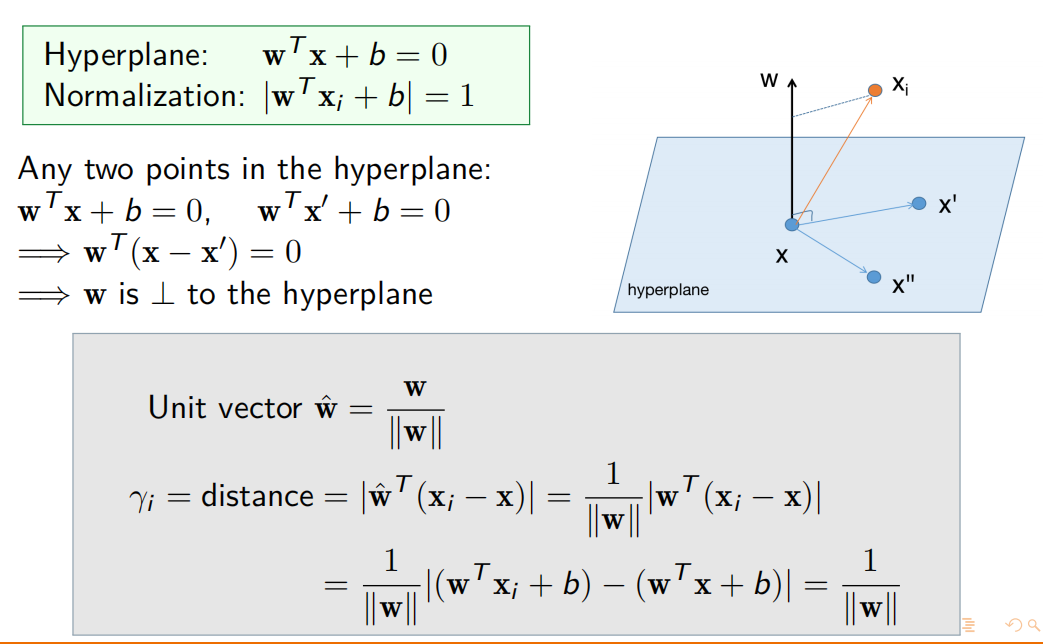

或者这里也可以换一个思路，由于数据集$ X = {x_1, x_2, x_3, ..., x_n}已经给定

因此可以看作常数，此时我们只需要寻找一个投影方向，让投影值最大。

也就是求w

当然，直接求w是求不出来的，除非只有两个数据点（也就是上一节课演示中的最简单情况，各位同学在使用qpsolvers求解的时候可以试试删除限定调节看看）。

由于距离

$ w^T*x + b =0 $ 

最近的点，其间距都有“1”

那么剩下的点肯定就都大于“1”

所以就有了

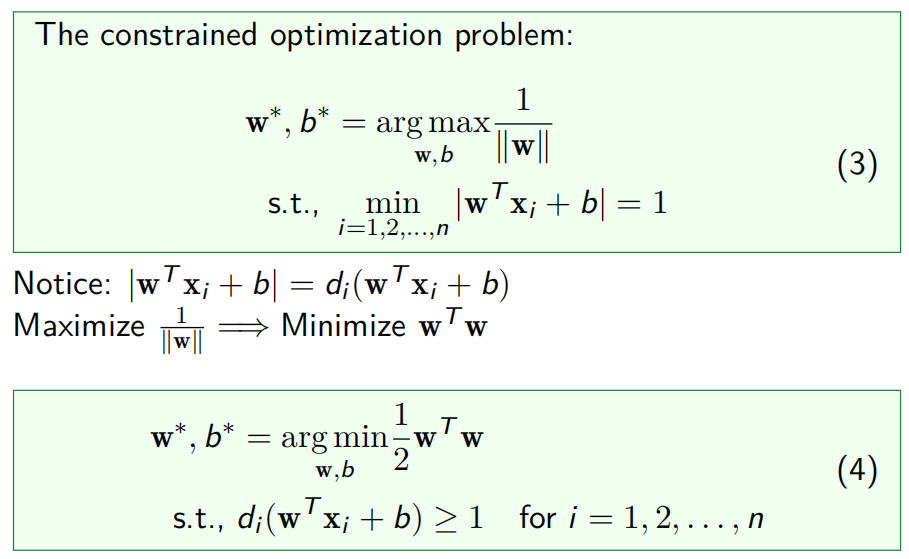

这显然是一个限定条件下的极值问题

所以我们很自然的想到了拉格朗日乘数法

由于限制条件有N个（和需要分类的数据点总数相同），所以有

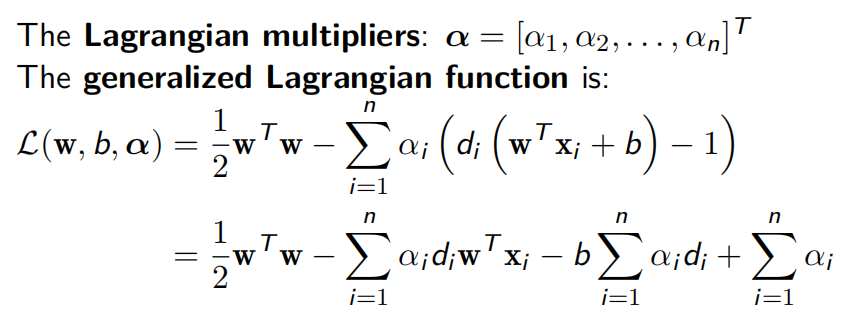

根据拉格朗日乘数法标准流程

求偏导，最后我们得到：

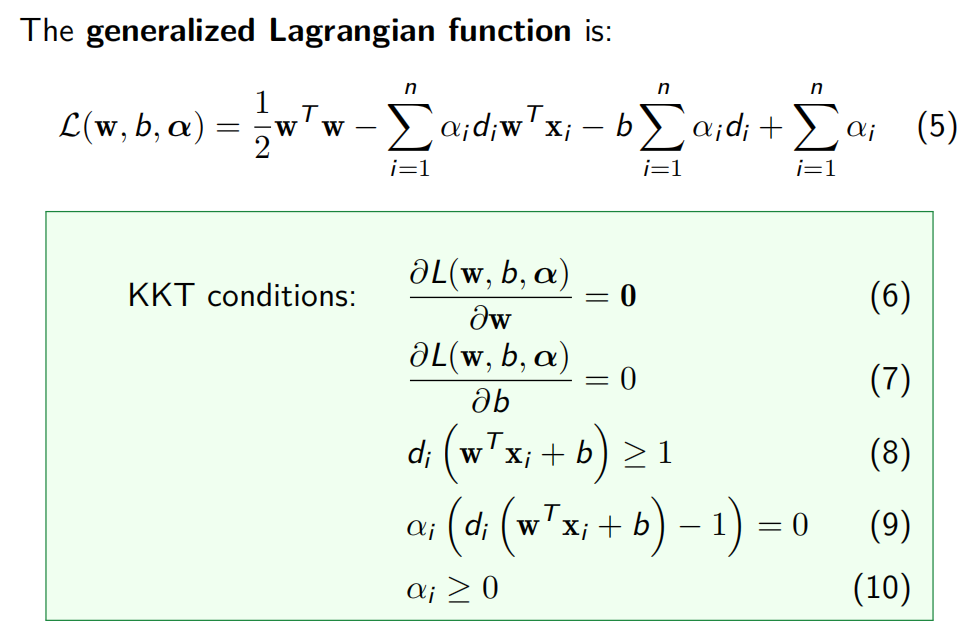

经过一系列化简，最终我们得到

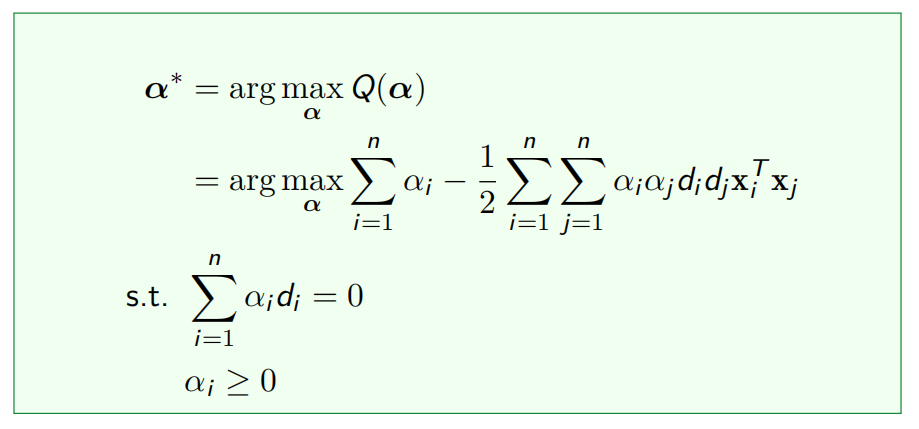

综上所述，我们将一个实际问题用数学语言表现了出来，并最终归纳为了一个二次规划问题。

而二次规划问题的求解方法，我们已经练习过了。

当然，实际应用中面对的二次规划问题不可能像上课举例的这样简单，解决这些问题时可能会遇到各种问题。

受限于水平，这里没法面面俱到，只能具体问题具体分析。

示例程序

In [13]:
# 生成数据
n1 = 5
n2 = 5
x1 = np.zeros([2, n1])
x2 = np.zeros([2, n2])
d = np.zeros([1, n1 + n2])
for i in range(0, np.shape(x1)[1]):
    x1[0, i] = np.random.uniform(0, 5, size=None)
    x1[1, i] = np.random.uniform(0, 5, size=None)
for j in range(0, np.shape(x2)[1]):
    x2[0, j] = np.random.uniform(5, 10, size=None)
    x2[1, j] = np.random.uniform(5, 10, size=None)
for k in range(0, n1 + n2):
    if k <= np.shape(x1)[1] - 1:
        d[0, k] = -1
    else:
        d[0, k] = 1
x = np.hstack((x1, x2))

# 创建矩阵
dd = np.dot(d.T, d)
xx = np.zeros([n1 + n2, n1 + n2])
for i in range(0, n1 + n2):
    for j in range(0, n1 + n2):
        xx[i, j] = np.dot(x[:, i].T, x[:, j])

In [14]:
# 求解
P = dd*xx
q = -np.ones([n1 + n2, 1])
G = -np.eye(n1+n2)
h = np.zeros([n1+n2,1])
A = d
b = np.zeros([1, 1])

alphas = solve_qp(P, q, G, h, A, b, solver='cvxopt')

[[0.31325756]
 [0.30166881]]
-3.3817707039170477
[-1.03841545]
[11.21020984]


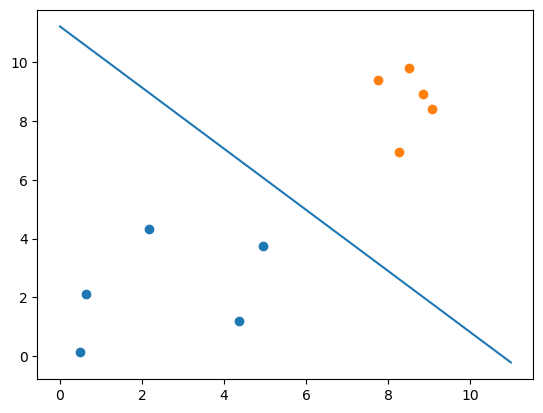

In [15]:
# 计算参数
w = np.zeros([2, 1])
b = np.zeros([1, n1+n2])
for j in range(0, n1 + n2):
    w[0, 0] = w[0, 0] + alphas[j]*d[0, j]*x[0, j]
    w[1, 0] = w[1, 0] + alphas[j]*d[0, j]*x[1, j]
for j in range(0, n1 + n2):
    b[0, j] = 1/d[0, j]-np.dot(x[:, j],w)

b = np.sum(b)/(n1+n2)

c1 = -w[0]/w[1]
c2 = -b/w[1]
print(w)
print(b)
print(c1)
print(c2)
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# 显示数据
plt.figure()
plt.scatter(x1[0, :], x1[1, :])
plt.scatter(x2[0, :], x2[1, :])
plt.plot(t, c1*t+c2)
plt.show()

# 支撑向量机中的软边界

不是所有情况都和上面的范例演示的那样，能一眼看出分界线在哪儿的。

有时候两类数据会有一定的混合，边界不甚明朗。

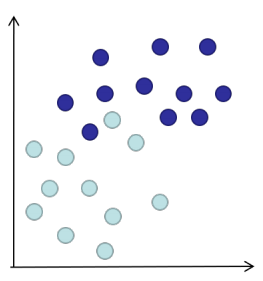

这个时候有两种方法来处理这个问题。

其一就是软边界。

所谓软边界，是另一种处理边界模糊问题的方案

从数学推导上，软边界问题相比于常规的SVM问题（硬边界）问题，唯一的区别是多了一个限制条件$ λ $

因此尽管数学推导上要费一番周折，但是实际求解时只需要在qpsolvers等二次规划问题求解器上新增一个限制条件即可。

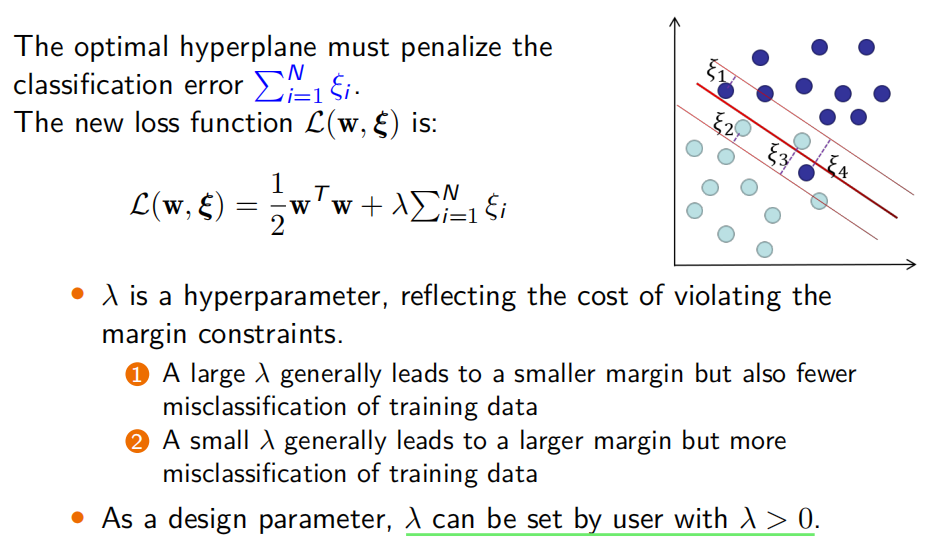

# 支撑向量机中的核方法

核方法是另一种处理边界模糊问题的方法。

简单来说就是升维，通过提升一个维度的视角，让原本不可分割的数据变得可以分割

我们需要构造一个核函数

$ K(x_i,y_j) =(1+x_i^T * x_j)^q $

以生成新的，高维数据的$ X^T * X $矩阵(蓝色字体)

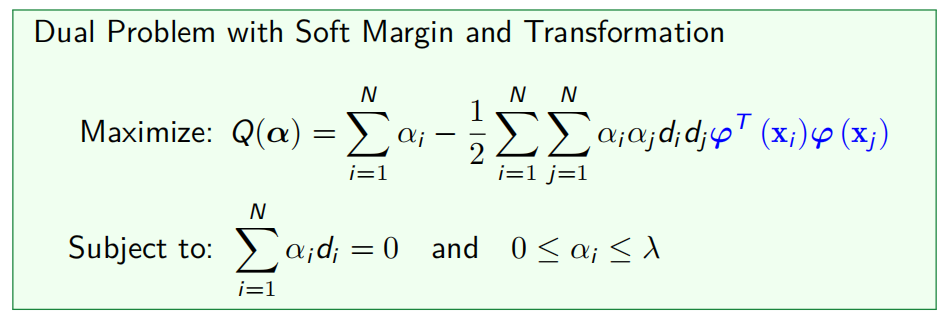

原来的情况是这样的

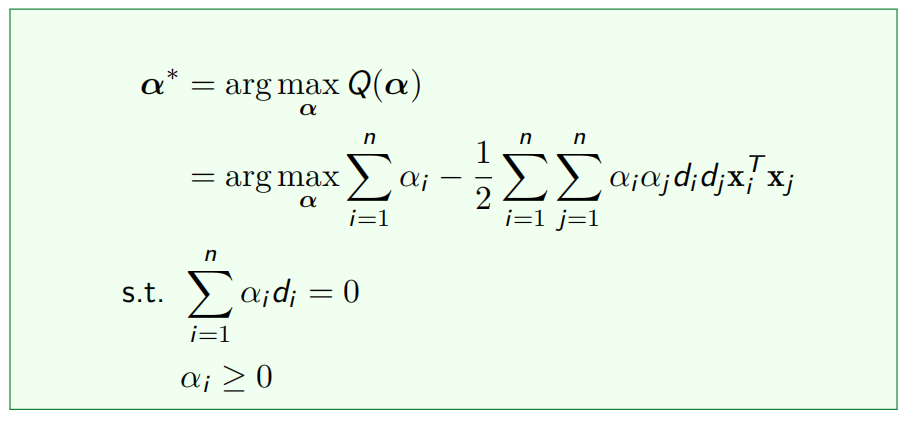

我们这里只演示一下格拉姆矩阵（Gram Matrix）$ K $的构造，剩下的求解方法同样是用qpsolvers来进行(其实也不用演示，就一个循环就行了)

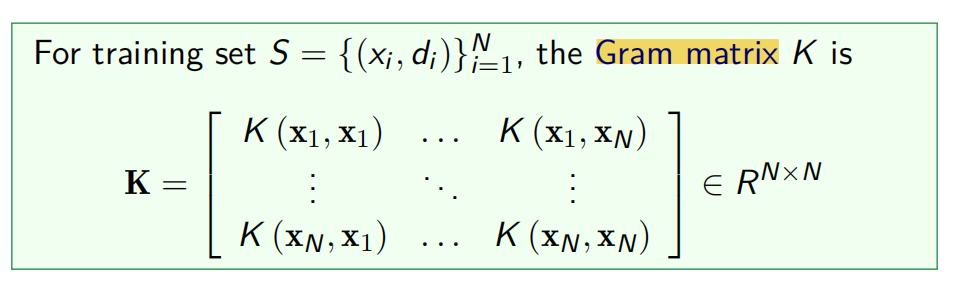

In [16]:
# 导入库
import numpy as np


# 定义函数
def kernel(x_a, x_b):
    return (1 + np.dot(x_a.T, x_b))**2


# 数据
d = 3
n = 5
x = np.random.uniform(0, 5, size=[d, n])
x = np.mat(x)

# gram matrix计算
K = np.zeros([n, n])
for i in range(0,n):
    for j in range(0, n):
        K[i, j] = kernel(x[:, i], x[:, j])
print(K)


[[3546.18171327 1071.45996655  202.47268949  363.16918946 1071.10577446]
 [1071.45996655  760.69903335   86.3516537   113.51848071  176.09038997]
 [ 202.47268949   86.3516537    21.25291221   26.46721695   57.83771434]
 [ 363.16918946  113.51848071   26.46721695   43.3492922   117.90869833]
 [1071.10577446  176.09038997   57.83771434  117.90869833  431.84631582]]


格拉姆矩阵（Gram Matrix）$ K $构造之后就是求解，其步骤也和之前区别一样。

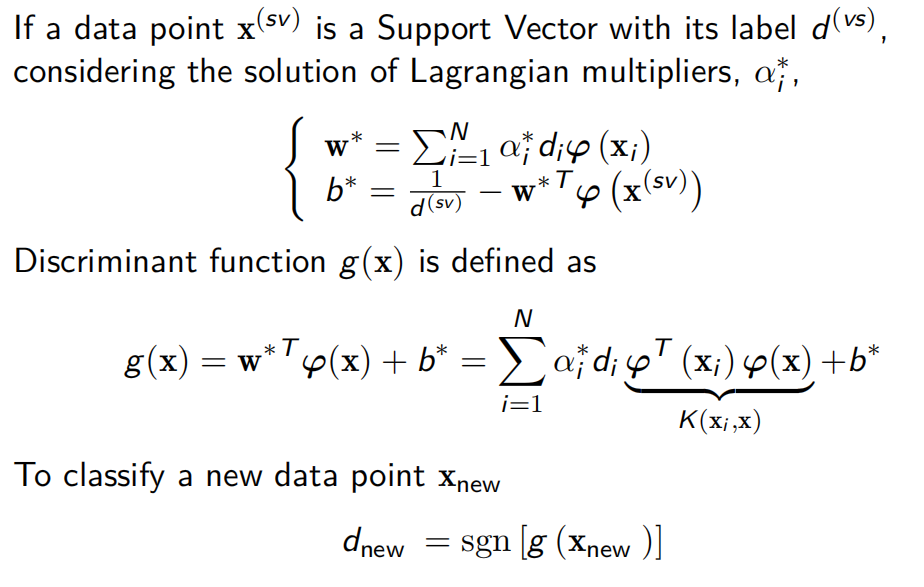

# 本次课的正式内容

下面我们就开始本次课的学习。

主成分分析是统计学分析中常用的一种数据处理与分析方法，常用于数据降维。

通过将数量很多的变量转换为仍包含集合中大部分信息的较少变量来降低数据集的维数。

减少数据集的维数自然会导致精度下降，但降维减少了数据量，而且易于可视化。

主成分分析的数学原理简单概括如下：

从一个n维数据集中，怎么样找出最具“代表性”的那几个维度，然后降低数据集的维数。

主成分分析在数学上的推导思路有两个，分别是：

（1）最大化投影方差



（2）最小化重构误差

但是这两个思路的最终结论是一样的，所以不影响我们程序的编写。

# PCA的Python实现

以上我们简单介绍了主成分分析

那么下面就是怎么实现了。

————————————————————————————————————————————————————————————————

主成分分析的算法思路相对比较清晰，我们按照步骤一步一步的拆解一下。


标准流程的第一步是Feature standardization

但是这一步可以整合到后面的协方差矩阵的构造里面，所以我们先构建协方差矩阵。

还记得我们上一节课讲到的关于python的矩阵操作的内容吗？

我们这里就需要用到了。

当然，协方差也可以用np.cov(x, y)命令来计算，各位同学可以试试看两种方法的结果是否相同。


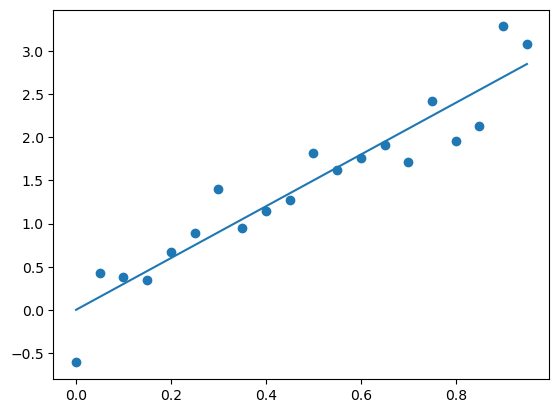

S
[[ 1.6625      5.05364159]
 [ 5.05364159 17.16977228]]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数据X=[x1,x2,x3,...,xn]'
n = 20
X = np.zeros([n,2])
eps = np.zeros([n,1])
for i in range(0, np.shape(X)[0]):
    X[i, 0] = i/np.shape(X)[0]
    eps[i, 0] = np.random.normal(loc = 0, scale = 0.25, size = None)
X[:, 1] = 3*X[:, 0] + eps[:, 0]

# 画图
plt.figure()
plt.plot(X[:, 0], 3*X[:, 0])
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# 计算协方差矩阵
# 构造H
H = np.eye(n)-(1/n)*np.dot(np.ones([n, 1]), np.ones([1, n]))

# 协方差矩阵S = X'*H*X 
S = np.dot(np.dot(X.T, H),X)

print("S")
print(S)

第二步，协方差矩阵S的特征值分解。

我们获得了协方差矩阵S之后，下一步就是S的特征值分解，这里需用到的命令是这个：

np.linalg.eig

我们先试验一下


In [18]:
import numpy as np

# 矩阵
A = np.array([[1.0, 0.0, 0.0],
              [0.0, 5.0, 0.0],
              [0.0, 0.0, 9.0]])

# 特征值与特征向量
lam, x = np.linalg.eig(A)
print('特征向量')
print(x)
print('特征值')
print(lam)


特征向量
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
特征值
[1. 5. 9.]


In [19]:
# 特征向量分解协方差矩阵S

lam, v = np.linalg.eig(S)

print(v)
print(lam)

[[-0.958583   -0.28481335]
 [ 0.28481335 -0.958583  ]]
[ 0.16096641 18.67130587]


我们猜想特征向量时按列排的，也就是v的每一列是一个特征向量，同时顺序与特征值lam相对应

来验证一下看看

In [20]:
# 第一个特征值与第一列
print('eig1')
print(np.dot(S,v[:,0]))
print(lam[0]*v[:,0])

# 第二个特征值与第二列
print('eig2')
print(np.dot(S,v[:,1]))
print(lam[1]*v[:,1])

eig1
[-0.15429966  0.04584538]
[-0.15429966  0.04584538]
eig2
[ -5.31783708 -17.89799631]
[ -5.31783708 -17.89799631]


第三步，排序

获取协方差矩阵S的特征值和特征向量之后，接下来是排序，从大到小排序。

同时排序的还要有特征值对应的特征向量。

排序的命令是np.sort()以及np.lexsort()

同样的，我们先测试一下

In [21]:
A = np.array([1, 4, 2, 6, 3, 5])

B = np.sort(A)
print(sorted(B, reverse=True))

[6, 5, 4, 3, 2, 1]


In [22]:
A = np.array([[6, 3, 5], [1, 4, 2]])

B = np.sort(A)
print(B)

[[3 5 6]
 [1 2 4]]


可以发现np.sort的排序是不对应的，直接用会打乱顺序，但是实际排序的时候，特征值和特征向量必须对应，不能乱排

In [23]:
F = np.zeros([3, 2])
F[1:3, :] = v
F[0, :] = np.abs(lam)

print("F")
print(F)
print(F[:, np.lexsort(F)])

F
[[ 0.16096641 18.67130587]
 [-0.958583   -0.28481335]
 [ 0.28481335 -0.958583  ]]
[[18.67130587  0.16096641]
 [-0.28481335 -0.958583  ]
 [-0.958583    0.28481335]]


第四步，选择主成分

选择最前面的q个，然后“拼”成一个变换矩阵G，当然我们这只有二维数据，所以只好两个都选一下看看

第五步，组成变换矩阵

组成矩阵，之后变换一下看看变换后的数据是什么样。

In [24]:
G = -F[:, np.lexsort(F)][1:3,:]
print(G)

[[ 0.28481335  0.958583  ]
 [ 0.958583   -0.28481335]]


第六步，投影

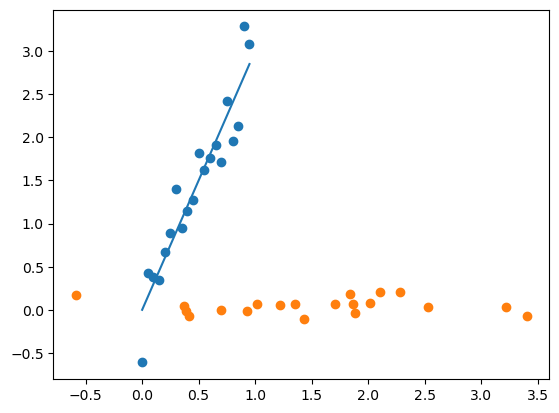

In [25]:
Y = np.dot(G, X.T).T

plt.figure()
plt.plot(X[:, 0], 3*X[:, 0])
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()


除了特征向量分解的方法，《机器学习》中也提到了SVD，奇异值分解的方法

我们这里一并也给同学们介绍一下相关的命令np.linalg.svd


In [26]:
import numpy as np

# 矩阵
A = np.array([[1.0, 0.0, 0.0],
              [0.0, 5.0, 0.0],
              [0.0, 0.0, 9.0]])

# 特征值与特征向量
u1, sigma, v1 = np.linalg.svd(A)
print(u1)
print(np.diag(sigma))
print(v1)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[9. 0. 0.]
 [0. 5. 0.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]



那这里我们就应用一下SVD方法，看看能不能和特征向量分解的方法得到一样的结果


In [27]:
# S的奇异值分解分解
U, Sig, V = np.linalg.svd(S)

# 显示
print(U)
print(Sig)
print(V)

[[-0.28481335 -0.958583  ]
 [-0.958583    0.28481335]]
[18.67130587  0.16096641]
[[-0.28481335 -0.958583  ]
 [-0.958583    0.28481335]]



SVD同样也能获取矩阵的特征值，但是它不计算特征向量，我们还要自己计算特征向量。

那么问题就是，怎么已知特征值求解特征向量。

最直接的方法就是直接求解方程组。

python中求解方程组的方法是np.linalg.solve(A, b)

但是需要注意的是，通过特征值反过来求解特征向量的时候需要求解的方程组不是满秩的，这个时候上面的命令不能直接用。

我们拿一个方程组来试试看

$ x + y = 0 $

$ 3x + 3y = 0 $

显然应该有 -1 和 1这个解，但是实际上并没有

In [28]:
r1 = np.linalg.solve([[1,1],[3,3]], np.zeros([2, 1]))

print(r1)

[[0.]
 [0.]]


直接求只会得到0矩阵，但是0矩阵肯定不是我们想要的，我们要的是非0解。

当然，真的要解决实际问题的时候，各位同学肯定会第一时间选择掉包。

毕竟那是全世界顶级程序员验证过的函数库，没理由比自己课堂上几个小时写出来的程序差。

但是在学习过程中，我们还是要从比较基础的原理出发。

现在我们要解决不满秩方程组求解的问题。

需要用到的命令：

scipy.linalg.null_space()

参考资料：https://blog.csdn.net/dongke1991/article/details/127447251

In [29]:
import scipy

A = np.mat([[1, 1], [3, 3]])

x = scipy.linalg.null_space(A)

print(x)

[[-0.70710678]
 [ 0.70710678]]


有了这个命令，我们可以根据特征值来求解特征向量了

In [30]:
v1 = scipy.linalg.null_space(S - lam[0]*np.eye(2))
v2 = scipy.linalg.null_space(S - lam[1]*np.eye(2))

print('特征值1与特征向量1')
print(lam[0])
print(v1)

print('特征值2与特征向量2')
print(lam[1])
print(v2)

特征值1与特征向量1
0.16096640852207145
[[-0.958583  ]
 [ 0.28481335]]
特征值2与特征向量2
18.671305873869578
[[-0.28481335]
 [-0.958583  ]]


对于三维等高维情况，方法也是类似的，这里也举一个三位情况下的例子

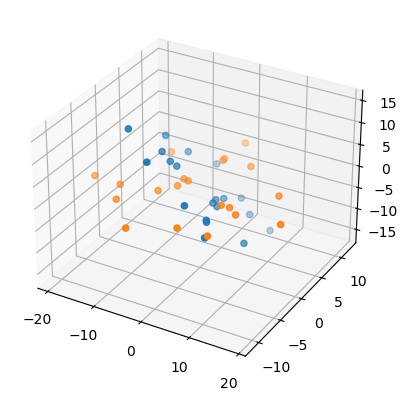

In [31]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
import scipy


# 定义平面
def plane(x, y):
    return -(x + y)


# 算数据
d = 3
n = 20
xx = np.random.uniform(low=-10.0, high=10.0, size=[1, n])
yy = np.random.uniform(low=-10.0, high=10.0, size=[1, n])
zz = plane(xx, yy)

# 构建数据集
X = np.zeros([d, n])
X[0, :] = xx
X[1, :] = yy
X[2, :] = zz
X = X.T

# 构造H
H = np.eye(n)-(1/n)*np.dot(np.ones([n, 1]), np.ones([1, n]))

# 协方差矩阵S = X'*H*X
S = np.dot(np.dot(X.T, H), X)

# 特征值与特征向量
lam, v = np.linalg.eig(S)

# 特征值按大小排序
lam = sorted(np.abs(lam), reverse=True)

# 重新计算特征向量
v1 = scipy.linalg.null_space(S - lam[0]*np.eye(d))
v2 = scipy.linalg.null_space(S - lam[1]*np.eye(d))

# 变换矩阵构建
G = np.hstack((v1, v2))

# 变换后的数据
Y = np.dot(X, G)

# 创建图像
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# 画曲线
ax.scatter(xx, yy, zz)
ax.scatter(Y[:, 0], Y[:, 1], np.zeros(n))

# 显示
plt.show()


————————————————————————————————————————————————————————————————

上面的范例基本上把主成分分析PCA的一些关键地方都说到了，那么下面我们开始实际的一个练习。

主成分分析的实际应用练习，EEG分析，也是本次课的作业。

进度快的同学在掌握了PCA的相关用法之后可以直接在课堂上就开始完成作业。

上次课的作业说的不够清楚，这次我们试着形成一个明确的作业要求。


# 作业：尝试应用PCA分析一下多通道EEG信号

作业内容：用主成分分析（PCA）方法对多通道脑电信号（EEG）进行分析。

脑电波（Electroencephalogram,EEG）是一种使用电生理指标记录大脑活动的方法。是大脑活动时，大量神经元同步发生的突触后电位经总和后形成的，是脑神经细胞的电生理活动在大脑皮层或头皮表面的总体反映。

EEG信号包含多个相关电位数据集（Event Related Potential），可以看作是多个ERP成分的叠加。

通过PCA，可以用来提取其中的主要成分。

作业要求：

（1）通过Jupyter notebook提交；

（2）从数据库中选择3-5个channel的eeg信号作为目标进行分析；

（3）要包含必要的文字注释（markdown），程序（需要可运行，运行结果需正确，而且符合规范），以及可视化的结果，还有分析；

（4）不能直接使用python的PCA工具包（mne包以及sklearn.decomposition中的PCA包）得出结论，但是可以作为对比或者验证；

（5）作业jupyter文档要按照科技论文的结构，包含Abstract, Introduction, Methods, results, conclusion & discussion，各个部分的字数暂时不做限制，但是建议各位同学多写一些以作为科技论文写作的前期练习；

（6）考虑到不是所有同学都是做EEG的，如果各位同学手上有其他可以分析的数据素材，也可以替换EEG数据集，但是需要在作业中注明。

可能用到的标准包：

import mne

from sklearn.decomposition import PCA

P.S. EEG信号数据库：

BCI Competitions：bbci.de/competition/

EEGbase：http://eegdatabase.kiv.zcu.cz/

OpenNEURO：http://www.eecs.qmul.ac.uk/mmv/datasets/deap/

等等。

其他EEG数据库汇总见：

https://zhuanlan.zhihu.com/p/377480885

以及：

https://zhuanlan.zhihu.com/p/508338182
